<span><a href="https://nbviewer.jupyter.org/github/ETCBC/Probabilistic_Language_Change/blob/master/analysis.ipynb?flush_cache=true">For best formatting view in NB viewer...</a></span>

<h1 align="center">Analysis Notebook:</h1>
<h2 align="center">A Probabilistic Approach to Linguistic Variation and Change in Biblical Hebrew</h2>

<br>

<table border="0">
    <tr>
        <th>Wido van Peursen</th>
        <th>Sandjai Bhulai</th>
        <th>Etienne van de Bijl</th>
        <th>Cody Kingham</th>
    </tr>
    <tr>
        <td>
            <a href="https://research.vu.nl/en/persons/wido-van-peursen"><img src="images/peursen_wido_van.jpg"></a>
        </td>
        <td>
            <a href="https://research.vu.nl/en/persons/s-bhulai"><img src="images/bhulai_sandjai.jpg"></a>
        </td>
        <td>
            <a href="https://nl.linkedin.com/in/etienne-van-de-bijl-68796218"><img src="images/bijl_etienne_vande.jpg"></a>
        </td>
        <td>
            <a href="http://www.codykingham.com"><img src="images/kingham_cody.jpg"></a>
        </td>
    </tr>
</table>

<table border="0">
    <tr>
        <td>
            <a href="http://networkinstitute.org/projects/a-probabilistic-approach-to-linguistic-variation-and-change-in-biblical-hebrew/">
                <img src="images/network_institute.png" height=80 width=232>
            </a>
        </td>
        <td>
            <a href="http://www.etcbc.nl">
                <img src="images/etcbc_logo.png" height=80 width=232>
            </a>
        </td>
        <td>
            <a href="https://science.vu.nl/en/index.aspx">
                <img src="images/science_logo.png" height=54.5 width=215>
            </a>
        </td>
    </tr>
</table>

<br>

## Research Question 

In this notebook we gather and analyze data on linguistic tendencies accross select books in the Hebrew Bible. Our primary research question is: 
> **Can we cluster books of the Hebrew Bible based solely on linguistic state changes at the phrase and word levels?**

A linguistic state change is any shift from one kind of linguistic unit to another when reading a text sequentially. An example is a shift from a `subject` phrase to a `predicate` phrase function. Another example is a shift from a `noun` to a `verb`. Traditionally Hebrew linguists have analyzed tendencies amongst select states, especially `subject`, `verb`, `object` ("SVO" or "VSO") (CITATION). These analyses may focus mainly on certain clause types (CITATION). Our analysis looks at any two state changes across phrase and word types. Specifically, we look at transitions in word type via part of speech and phrase type via function and phrase type. The potential values for these sets of features can be seen in the ETCBC's [BHSA documentation](https://etcbc.github.io/bhsa/features/hebrew/c/0_home.html).

This research question is significant for three reasons. First, Hebraists often disagree about the scope of difference between linguistic usage between various Hebrew books (CITATION). By testing whether linguistic patterns like state changes yield detectable differences, we can determine how syntax varies and changes within the corpus. Second, Hebraists commonly rely on telling morphological or lexical tendencies to classify the language of Hebrew books. Yet, this approach only takes into account a limited aspect of language use and does not look at subtle syntactic differences. But identifying these differences and classifying books based on them, we can obtain more robust categories for the books of the Hebrew Bible. Third, since the current methods of classification often focus on a limited range of features, it is important to test whether a syntactic analysis confirms the groupings of the literature. Traditional scholarship divides books into two broad classes: Late Biblical Hebrew (LBH) or Standard Biblical Hebrew (SBH). Scholars still debate the classification of books such as Ruth or Jonah. For this study, we exclude books with questionable classification in order to test the validity of the traditional groups. If we cannot falsify the traditional classes, then our model can in the future serve as a baseline against which to measure debateable books. 

## Research Design

In this project, we test the following books and their traditional classification:

| Class | Books                                                                                         |
|-------|-----------------------------------------------------------------------------------------------|
| SBH   | Genesis, Exodus, Leviticus, Deuteronomy, Joshua, Judges, 1 Kings, 2 Kings, 1 Samuel, 2 Samuel |
| LBH   | Song of Songs, Ecclesiastes, Esther, Ezra, Nehemiah, 1 Chronicles, 2 Chronicles               |

We perform the data selection and analysis using Python. For all of our analysis we use the Hebrew syntactic data provided by the [Eep Talstra Centere for Bible and Computer](http://www.etcbc.nl) (ETCBC), a research group in the [Faculty of Religion and Theology](https://www.godgeleerdheid.vu.nl/en/research/institutes-and-centres/eep-talstra-centre-for-bible-and-computer/index.aspx) at the Vrije Universiteit Amsterdam. This is provided through the [Biblia Hebraica Stuttgartensia Amstelodamensis](https://etcbc.github.io/bhsa/) (BHSA), an export of the ETCBC database in a format which can be easily processed in Python. Specifically, the data format is [Text-Fabric](https://dans-labs.github.io/text-fabric/) ([Dirk Roorda](https://github.com/dirkroorda) at DANS Labs) which likewise has an accompanying Python package for selecting and processing data.

We divide every book into narrative and quotation clauses, using the ETCBC labelings. The classification of narrative versus quotation is called the `domain` in the database. Thus, for each book, we test two domains. Within each domain (narrative vs. quotation) we look at bigrams in word or phrase types. A bigram is a selection of two given units (word or phrase) within the clause. The diagram below illustrates [phrase function](https://etcbc.github.io/bhsa/features/hebrew/c/function.html) bigrams and how they're delineated in Genesis 1:1.

<img align="center" src="images/phrase_bigram_fig.png" height="50%" width="50%">

Above, each outline represents a separate bigram which is counted in our dataset. For this example, then, there are three bigrams. The counts would be made in our dataset accordingly:

|      bigram        |  count |
|--------------|---|
| Time -> Pred | 1 |
| Pred -> Subj | 1 |
| Subj -> Objc | 1 |

We do this for every clause per domain (narrative and quotation) and count each bigram individually. That is the first step. But these counts alone cannot tell us much about language properties.

Our research question asks whether these bigrams can be modeled as properties of language. That is, can sequential progressions of linguistic labels at the clause level function as indicators of linguistic tendencies. And furthermore, can these tendencies be used to classify and cluster books in the Hebrew Bible? If so, what do the results suggest about traditional groupings?

A language "tendency" can be modeled in terms of probability. That is, when language users employs different styles or dialects, the probability that a certain linguistic form is followed by another is different. These probabilities of sequence can be modeled using the statistical concept of a Markov chain. A Markov chain models the probability of particular changes in a situation based on a starting point. One can imagine the predictive text of a mobile phone, which suggests probable words based on what is being typed. Markov chains are frequently utilized in the financial world to predict changes in the market. The diagram below illustrates a hypothetical Markov chain for this application:

<a href="https://en.wikipedia.org/wiki/Markov_chain"><img align="center" src="images/markov_example_wikipedia.png"></a>

In a Markov chain, situations are called "states." A shift from one state to another is known as a state transition. The likelihood of a certain state transition is called the transition probability. The chart shows three possible market states: a 'bull market', a 'bear market', or a 'stagnant market'. Based on past data of changes in the market, the chart shows the likelihood of arriving at any of these three states from another state. Imagining that we are in a bull market, we see that there is a very high probability, 0.9 (or 90%) that we remain in a bull market. On the other hand, there is a much smaller chance, 0.075 (or 7.5%) that we enter a bear market. Since these probabilities are calculated on past data, they tell us something about the tendencies of this given market. One could imagine, however, that these numbers would vary depending on the specific market in question. For example, perhaps this chart models the New York Stock Exchange, but in the Euronext Stock Exchange (Amsterdam) the likelihood of going from a bull market to a bear market is lower, say at 0.05 (5%). This might have further implications for how one plans to invest their money, because the data says something about the market's behavior and discrete properties.

In the same way, we can model the tendencies of a language and its constituent parts through a Markov chain. This statistical method is already used widely in the Natural Language Processing world for machine generated translations, morphological parsing, and word-sense disambiguation (CITATION). At the same time, Hebraists have long guessed that sequentiality says something about language tendency. Studies of Classical Hebrew often examine the way in which subject, verb, and object phrases order themselves around each other. These analyses are further used as indicators of chronological change in Hebrew, with proposals that Hebrew gradually shifted from a verb-subject-object language (VSO) to a subject-verb-object (SVO) language. These manual approaches are inherently limited, though, in their ability to measure all phrase types. Indeed, subject, verb, and objects are key to a sentence's syntax. But the manual approach does not take into account the interaction of other elements such as adverbial or adjectival phrases. Furthermore, there is a basic assumption that indeed subject, verb, and object phrases present the strongest indicators of linguistic change. But perhaps other, more subtle, indicators might show key differences? Finally, there is an inherent limitation in terms of the number of potential transitions which can be considered by a focused, manual approach. By the ETCBC database's setup, there are [thirty different phrase function labels](https://etcbc.github.io/bhsa/features/hebrew/c/function). Thus, to consider all possible combinations of these labels, one would have to individully examine 900 different patterns, punching pattern searches into a software program and sorting through the significance of each one. The Markov chain method, however, enables all of these patterns to be considered simultaneously, so that the most relevant differences can be seen and analyzed.

Expanding on the example of Genesis 1:1, we can illustrate a primitive markov model based on that verse alone, which contains only three transitions: `Time -> Pred`, `Pred -> Subj`, and `Subj -> Objc`. Assuming our model has only "seen" this sentence, our Markov diagram would look as follows:

<img align="center" src="images/markov_gen1.png" height="30%" width="30%">

The probabilities are all equal since the ratios are obtained by dividing the transition count by the total number of values (in this case, 1÷3). Obviously, there is limited value in such a small-scale model, which really only tells us the probabilities of state changes within this sentence. But with the addition of more sentences, the model encapsulates more of the language's tendencies. For instance, if we add the transitions of Genesis 1:2 (first sentence only), we see the `Pred -> Subj` observation of Genesis 1:1 moderated with the `Subj -> Pred` pattern of Genesis 1:2:

> DIAGRAM HERE

*To be continued...*

## Analysis

In this section we load the ETCBC data and measure the transitions.

In [1]:
# import standard libraries
import os, collections
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain
from scipy.cluster import hierarchy
import seaborn as sns

os.sys.path.append('project_code') # project code modules
from project_code.data.bhsa import * # load BHSA Hebrew syntax data 
from project_code.markov.Markov_Chain import * # custom methods for Markov transitions
from clustering.Clustering_analysis import * # custom methods for cluster analysis

dataset = get_data(books=["sbh","lbh"]) # generate the dataset

**Documentation:** <a target="_blank" href="https://etcbc.github.io/bhsa" title="{provenance of this corpus}">BHSA</a> <a target="_blank" href="https://etcbc.github.io/bhsa/features/hebrew/2017/0_home.html" title="{CORPUS.upper()} feature documentation">Feature docs</a> <a target="_blank" href="https://dans-labs.github.io/text-fabric/Api/Bhsa/" title="BHSA API documentation">BHSA API</a> <a target="_blank" href="https://dans-labs.github.io/text-fabric/Api/General/" title="text-fabric-api">Text-Fabric API 5.5.18</a> <a target="_blank" href="https://dans-labs.github.io/text-fabric/Api/General/#search-templates" title="Search Templates Introduction and Reference">Search Reference</a>

### Examine the Dataset

First, we analyze the number of unique features in the dataset. This allows us to survey whether any datapoints are too sparsely represented for analysis.

In [2]:
features_unique = collections.defaultdict(dict)

# make count of unique values in dataset
for feature, domains in dataset.items():
    unique_values = set()
    for domain, books in domains.items():
        for book, clauses in books.items():
            feature_values = set(chain(*clauses))
                
            unique_values = unique_values | feature_values
            
    features_unique[feature] = list(unique_values)
    
unique_counts = dict((feature, len(values)) for feature, values in features_unique.items())
unique_counts

{'clause_types': 42,
 'phrase_functions': 29,
 'phrase_types': 13,
 'word_pos': 14}

We put the unique counts in the table below. On the right, we see the size of the matrix according to the transitions that can occur. What we can observe is that the biggest number of unique transitions is for clause-types.

| Feature          | Unique features | Unique 1 gram transitions |
|------------------|-----------------|---------------------------|
| Clause_types     | 42              | 42*42 = 1764              |
| Phrase_functions | 29              | 29*29=841                 |
| Phrase_types     | 13              | 13*13=160                 |
| Word_pos         | 14              | 14*14-196                 |

In the next figure, we see the average number of items per feature and domain level.

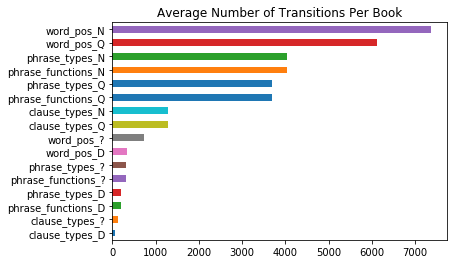

In [3]:
samples_ = collections.defaultdict(dict) # put counts here

# make the counts
for feature in dataset.keys():
    for domain in dataset[feature].keys():
        for book in dataset[feature][domain].keys():
            items = dataset[feature][domain][book]            
            samples_[feature+"_"+domain][book] = len(list(chain(*items)))
                
# dataframe and plot
df_samples = pd.DataFrame(samples_).fillna(0).mean(0).sort_values()
df_samples.plot(kind="barh", title="Average Number of Transitions Per Book")

We see that the ? and D domains have the lowest average number of transitions per book. As it is required to have enough data points to make realistic transition probabilities estimations for a Markov Chain, we will exclude these domains moving forward. Our dataset will thus consist of the N and Q domains for the features word_pos, phrase_functions and phrase types.

Explaining this choice further, clause types has 1764 unique transitions. Yet, we also have about 1200 average transitions per book. The data is thus too sparse to make reliable estimations of probability since on average, there would be 1.1 number of transitions possible.

We apply the same logic to our chosen domains of `narrative` and `quotation`. Within those groups we remove the books with 100 or less items. In the code below we enact these changes to the dataset.

In [4]:
print('removing clause_types...')
del dataset["clause_types"]

print('removing D and ? domains...')
for f in dataset.keys():
    del dataset[f]["D"]
    del dataset[f]["?"]

removelist = []
for f in dataset.keys():
    for d in dataset[f].keys():
        for b in dataset[f][d].keys():
            n = samples_[f+"_"+d][b]
            if n < 100:
                removelist.append([f,d,b,f'samples: {n}'])

print('to be removed due to sample sizes:')
print('\n'.join(f'\t{rem}' for rem in removelist))
                
for i in removelist:
    del dataset[i[0]][i[1]][i[2]]          

features = ['phrase_functions', 'phrase_types', 'word_pos']
domain = ['N', 'Q']

removing clause_types...
removing D and ? domains...
to be removed due to sample sizes:
	['phrase_functions', 'N', 'Song_of_songs', 'samples: 4']
	['phrase_functions', 'N', 'Ecclesiastes', 'samples: 15']
	['phrase_types', 'N', 'Song_of_songs', 'samples: 4']
	['phrase_types', 'N', 'Ecclesiastes', 'samples: 15']
	['word_pos', 'N', 'Song_of_songs', 'samples: 4']
	['word_pos', 'N', 'Ecclesiastes', 'samples: 28']


Below we print out the total attested clauses in our remaining dataset. The first item is the feature type, followed by `N` (for narrative in a book) or `Q` (quotation). This is followed by the book names and the attested clauses in the dataset.

In [19]:
for data_type, domains in dataset.items():
    print(f'{data_type}')
    for domain, books in domains.items():
        print(f'\t{domain}')
        for book, clauses in books.items():
            print(f'\t\t{book} - {len(clauses)} clauses')

phrase_functions
	N
		Genesis - 3317 clauses
		Exodus - 1636 clauses
		Leviticus - 296 clauses
		Deuteronomy - 512 clauses
		Joshua - 1379 clauses
		Judges - 1760 clauses
		1_Kings - 2044 clauses
		2_Kings - 1996 clauses
		1_Samuel - 2156 clauses
		2_Samuel - 1701 clauses
		1_Chronicles - 1267 clauses
		2_Chronicles - 2217 clauses
		Ezra - 379 clauses
		Esther - 449 clauses
		Nehemiah - 801 clauses
	Q
		Genesis - 2501 clauses
		Exodus - 2496 clauses
		Leviticus - 2556 clauses
		Deuteronomy - 2902 clauses
		Joshua - 826 clauses
		Judges - 1039 clauses
		1_Kings - 1421 clauses
		2_Kings - 1199 clauses
		1_Samuel - 1794 clauses
		2_Samuel - 1329 clauses
		1_Chronicles - 489 clauses
		2_Chronicles - 962 clauses
		Ezra - 376 clauses
		Esther - 217 clauses
		Nehemiah - 398 clauses
		Song_of_songs - 452 clauses
		Ecclesiastes - 760 clauses
phrase_types
	N
		Genesis - 3317 clauses
		Exodus - 1636 clauses
		Leviticus - 296 clauses
		Deuteronomy - 512 clauses
		Joshua - 1379 clauses
		Judges - 1

A sample of each dataset is provided below. In the sample, we print the gathered feature strings for the first two clauses in the book. That is, each embedded list represents a clause. A book is a list of these clause lists. Indices for the abbreviated features' corresponding  values can be found in the following links: [phrase_functions](https://etcbc.github.io/bhsa/features/hebrew/c/function), [phrase_types](https://etcbc.github.io/bhsa/features/hebrew/c/typ), [word_pos](https://etcbc.github.io/bhsa/features/hebrew/c/pdp) (phrase-dependent).

In [23]:
for data_type, domains in dataset.items():
    print(f'{data_type}')
    for domain, books in domains.items():
        print(f'\t{domain}')
        for book, clauses in books.items():
            print(f'\t\t{book} - {clauses[:2]}')

phrase_functions
	N
		Genesis - [['Conj', 'Pred', 'Subj'], ['Conj', 'Pred', 'Subj']]
		Exodus - [['Conj', 'Pred', 'Subj', 'PreC'], ['Conj', 'Subj', 'Pred', 'PreC']]
		Leviticus - [['Conj', 'Pred', 'Cmpl'], ['Conj', 'Pred', 'Subj', 'Cmpl', 'Loca']]
		Deuteronomy - [['Conj', 'Pred'], ['Time', 'Time', 'Time', 'Pred', 'Subj', 'Cmpl', 'Adju']]
		Joshua - [['Conj', 'Pred', 'Time'], ['Conj', 'Pred', 'Subj', 'Cmpl']]
		Judges - [['Conj', 'Pred', 'Time'], ['Conj', 'Pred', 'Subj', 'Cmpl']]
		1_Kings - [['Conj', 'PreO', 'Cmpl'], ['Conj', 'Pred', 'Cmpl', 'Subj']]
		2_Kings - [['Conj', 'Pred', 'Subj', 'Cmpl', 'Time'], ['Conj', 'Pred', 'Subj', 'Cmpl']]
		1_Samuel - [['Conj', 'Pred', 'Subj'], ['Conj', 'Subj', 'PreC']]
		2_Samuel - [['Conj', 'Pred', 'Time'], ['Conj', 'Subj', 'Pred']]
		1_Chronicles - [['Conj', 'Pred', 'Subj', 'Objc'], ['Subj', 'PreC']]
		2_Chronicles - [['Conj', 'Pred', 'Subj', 'Cmpl'], ['Conj', 'Subj', 'PreC']]
		Ezra - [['Conj', 'Pred', 'Objc', 'Loca'], ['Conj', 'Adju']]
		Esther - 

### Gathering Transition Probabilities

Having now prepared and inspected our dataset, we will now construct Markov transition probabilities using the feature bigrams within clauses. The code below iterates through each clause in the dataset coordinated to feature, domain, and book. As the code moves into and out of each clause, it adds a `Clause_End` and `Clause_Begin` feature. Adding these features allows us to consider the probability of a clause ending or beginning at a given feature state within a given book.

The bigrams are counted into a transition matrix, which we show and explain below.

In [30]:
dataset_trans = collections.defaultdict(dict)
dataset_MC = collections.defaultdict(dict)

for feature in dataset.keys():
    for domain in dataset[feature].keys():
        df = dataset[feature][domain]
        transMatrix = transitionMatrix(df, clause_states=True) # apply custom function to measure bigrams
        dataset_trans[feature][domain] = transMatrix 
        dataset_MC[feature][domain] = MCTransformation(transMatrix)

A sample transition matrix is displayed below for word part of speech features in `narrative` domain in Genesis. A transition matrix shows counts for transitions between the column and row elements. The row and column labels are identical. 

In [29]:
dataset_trans['word_pos']['N']['Genesis'] 

,nmpr,inrg,conj,Clause_End,advb,Clause_Begin,intj,prde,adjv,prps,nega,art,prep,verb,prin,subs
nmpr,56.0,0.0,191.0,818.0,12.0,0.0,0.0,0.0,10.0,5.0,2.0,25.0,384.0,69.0,0.0,342.0
inrg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
conj,187.0,0.0,5.0,0.0,22.0,0.0,42.0,15.0,30.0,26.0,39.0,41.0,294.0,2323.0,0.0,313.0
Clause_End,0.0,0.0,0.0,0.0,0.0,3316.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
advb,10.0,0.0,5.0,78.0,7.0,0.0,0.0,0.0,1.0,8.0,2.0,6.0,39.0,36.0,0.0,31.0
Clause_Begin,17.0,2.0,2775.0,0.0,12.0,0.0,1.0,15.0,1.0,30.0,4.0,6.0,338.0,45.0,1.0,70.0
intj,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,2.0,8.0,0.0,21.0
prde,3.0,0.0,1.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,10.0,0.0,32.0
adjv,2.0,0.0,23.0,68.0,4.0,0.0,0.0,0.0,4.0,5.0,0.0,9.0,26.0,5.0,0.0,22.0
prps,12.0,0.0,14.0,15.0,2.0,0.0,0.0,0.0,2.0,0.0,3.0,4.0,8.0,23.0,0.0,12.0


In [31]:
# sanity check — should sum to 1 for each value/state
dataset_MC['phrase_functions']['N']['Genesis'].sum(1)

PreO            1.0
ModS            1.0
Clause_End      1.0
Supp            1.0
PrAd            1.0
Nega            1.0
Pred            1.0
NCoS            1.0
Exst            1.0
Objc            1.0
PreS            1.0
PreC            1.0
Adju            1.0
Frnt            1.0
Conj            1.0
Ques            1.0
Time            1.0
Intj            1.0
Loca            1.0
NCop            1.0
Clause_Begin    1.0
Cmpl            1.0
Modi            1.0
IntS            1.0
Rela            1.0
Subj            1.0
dtype: float64